In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-81.34483000797198, -139.84897727200595),
 (-9.314029250149986, 7.266866500616686),
 (47.889459793841354, 178.5757020338836),
 (35.19576731015894, -140.6878420170114),
 (-12.161283613220888, -12.302672294234412),
 (-56.03667168743661, -128.27871058739098),
 (64.7082803682832, -123.90131082119605),
 (63.47926656343992, 127.95750273315372),
 (11.920729402839427, 104.56130239453853),
 (-36.22383269432133, -4.200991330809529),
 (-71.5327052500071, -91.24992197552423),
 (13.174076355780173, 4.613824087989201),
 (-47.828642160212524, -35.991544565291406),
 (-53.22201866484549, 154.64305999895953),
 (-75.62070109959426, 27.877378015265634),
 (43.23002085438185, 24.2209566843664),
 (-56.85125752877922, 137.08058360805683),
 (-43.562335519351734, 113.09695571169163),
 (35.68418736591558, 39.372045523795634),
 (-72.16590089728462, 167.4577263736407),
 (-78.43251914917522, -105.42988952091565),
 (-49.96771055511523, 4.9023019360885485),
 (-11.213227262409006, 97.03270404458152),
 (-62.959223002

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the time library and the datetime module from the datetime library 
import requests
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a91ded1f4967e7b04877255b544cbaa"

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.13, 'feels_like': 75.87, 'temp_min': 75.13, 'temp_max': 75.13, 'pressure': 1020, 'humidity': 75, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 15.86, 'deg': 66, 'gust': 16.75}, 'clouds': {'all': 87}, 'dt': 1637947741, 'sys': {'country': 'PF', 'sunrise': 1637935547, 'sunset': 1637983757}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
Processing Record 2 of Set 1 | luanda
{'coord': {'lon': 13.2343, 'lat': -8.8368}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 79.54, 'feels_like': 79.54, 'temp_min': 79.54, 'temp_max': 79.54, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_l

{'coord': {'lon': 24.1667, 'lat': 43.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.66, 'feels_like': 35.47, 'temp_min': 38.66, 'temp_max': 38.66, 'pressure': 1002, 'humidity': 72, 'sea_level': 1002, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 182, 'gust': 4.47}, 'clouds': {'all': 100}, 'dt': 1637947745, 'sys': {'type': 1, 'id': 6369, 'country': 'BG', 'sunrise': 1637904599, 'sunset': 1637938302}, 'timezone': 7200, 'id': 729507, 'name': 'Lukovit', 'cod': 200}
Processing Record 16 of Set 1 | new norfolk
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.3, 'feels_like': 42.3, 'temp_min': 42.3, 'temp_max': 42.3, 'pressure': 1028, 'humidity': 94, 'sea_level': 1028, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 286, 'gust': 1.92}

{'coord': {'lon': 146.0333, 'lat': -17.5333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.59, 'feels_like': 76.21, 'temp_min': 74.59, 'temp_max': 74.59, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 9553, 'wind': {'speed': 1.12, 'deg': 196, 'gust': 2.46}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1637947748, 'sys': {'country': 'AU', 'sunrise': 1637955110, 'sunset': 1638002120}, 'timezone': 36000, 'id': 2162683, 'name': 'Innisfail', 'cod': 200}
Processing Record 31 of Set 1 | qaanaaq
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.27, 'feels_like': 10.27, 'temp_min': 10.27, 'temp_max': 10.27, 'pressure': 1008, 'humidity': 92, 'sea_level': 1008, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 27, 'gust': 

{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -29.6, 'feels_like': -41.21, 'temp_min': -29.6, 'temp_max': -29.6, 'pressure': 1022, 'humidity': 99, 'sea_level': 1022, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 3.29, 'deg': 149, 'gust': 3.22}, 'clouds': {'all': 82}, 'dt': 1637947753, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
Processing Record 47 of Set 1 | borba
{'coord': {'lon': -59.5939, 'lat': -4.3878}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.11, 'feels_like': 98.87, 'temp_min': 88.11, 'temp_max': 88.11, 'pressure': 1009, 'humidity': 67, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 22, 'gust': 2.95}, 'clouds': {'all': 92}, 'dt':

{'coord': {'lon': 45.3435, 'lat': 46.1711}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.6, 'feels_like': 31.69, 'temp_min': 39.6, 'temp_max': 39.6, 'pressure': 1026, 'humidity': 64, 'sea_level': 1026, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 13.85, 'deg': 122, 'gust': 23.67}, 'clouds': {'all': 100}, 'dt': 1637947817, 'sys': {'country': 'RU', 'sunrise': 1637900074, 'sunset': 1637932659}, 'timezone': 10800, 'id': 468747, 'name': "Yashkul'", 'cod': 200}
Processing Record 11 of Set 2 | marcona
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 12 of Set 2 | la tuque
{'coord': {'lon': -72.7824, 'lat': 47.4334}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 32.25, 'feels_like': 25.86, 'temp_min': 32.25, 'temp_max': 32.25, 'pressure': 1001, 'humidity': 93}, 'visibility': 7

{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 12.36, 'feels_like': 3.13, 'temp_min': 12.36, 'temp_max': 12.36, 'pressure': 1006, 'humidity': 85}, 'visibility': 9656, 'wind': {'speed': 5.75, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1637947594, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1637936935, 'sunset': 1637964550}, 'timezone': -21600, 'id': 6165406, 'name': 'Thompson', 'cod': 200}
Processing Record 29 of Set 2 | bethel
{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.93, 'feels_like': 37.13, 'temp_min': 41.11, 'temp_max': 46.76, 'pressure': 1002, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 280, 'gust': 26.46}, 'clouds': {'all': 90}, 'dt': 1637947822, 'sys': {'type': 1, 'id': 3888, 'country': 'US

{'coord': {'lon': 88.1167, 'lat': 47.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.61, 'feels_like': 3.42, 'temp_min': 12.61, 'temp_max': 12.61, 'pressure': 1036, 'humidity': 86, 'sea_level': 1036, 'grnd_level': 924}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 33, 'gust': 4.9}, 'clouds': {'all': 91}, 'dt': 1637947826, 'sys': {'country': 'CN', 'sunrise': 1637976633, 'sunset': 1638008404}, 'timezone': 28800, 'id': 1529651, 'name': 'Altay', 'cod': 200}
Processing Record 43 of Set 2 | sur
{'coord': {'lon': 59.5289, 'lat': 22.5667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.89, 'feels_like': 77.34, 'temp_min': 76.89, 'temp_max': 76.89, 'pressure': 1015, 'humidity': 65, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 354, 'gust': 9.98}, 'clouds': {'all': 4}, 'dt': 

{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.85, 'feels_like': 79.41, 'temp_min': 77.85, 'temp_max': 77.85, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.77, 'deg': 5, 'gust': 3.89}, 'rain': {'1h': 1.89}, 'clouds': {'all': 91}, 'dt': 1637947890, 'sys': {'country': 'ID', 'sunrise': 1637967679, 'sunset': 1638011482}, 'timezone': 25200, 'id': 1633419, 'name': 'Padang', 'cod': 200}
Processing Record 8 of Set 3 | puerto ayora
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.76, 'feels_like': 78.76, 'temp_min': 78.76, 'temp_max': 78.76, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 12.53, 'deg': 168, 'gust'

{'coord': {'lon': -98.1128, 'lat': 32.8085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.74, 'feels_like': 44.76, 'temp_min': 47.93, 'temp_max': 51.62, 'pressure': 1028, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1637947895, 'sys': {'type': 1, 'id': 5010, 'country': 'US', 'sunrise': 1637932386, 'sunset': 1637969222}, 'timezone': -21600, 'id': 4711647, 'name': 'Mineral Wells', 'cod': 200}
Processing Record 22 of Set 3 | nome
{'coord': {'lon': -165.4064, 'lat': 64.5011}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -16.53, 'feels_like': -26.72, 'temp_min': -16.53, 'temp_max': -16.53, 'pressure': 1014, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 30}, 'clouds': {'all': 1}, 'dt': 1637947895, 'sys': {'type': 1, 'id': 7770, 'country': 'US', 'sunrise': 

{'coord': {'lon': 104.2081, 'lat': 36.5583}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.08, 'feels_like': 22.08, 'temp_min': 22.08, 'temp_max': 22.08, 'pressure': 1022, 'humidity': 48, 'sea_level': 1022, 'grnd_level': 830}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 157, 'gust': 2.24}, 'clouds': {'all': 56}, 'dt': 1637947899, 'sys': {'type': 1, 'id': 9639, 'country': 'CN', 'sunrise': 1637970771, 'sunset': 1638006540}, 'timezone': 28800, 'id': 1817240, 'name': 'Baiyin', 'cod': 200}
Processing Record 38 of Set 3 | puri
{'coord': {'lon': 85.85, 'lat': 19.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.92, 'feels_like': 74.35, 'temp_min': 73.92, 'temp_max': 73.92, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.33, 'deg': 95, 'gust': 10.45}, 'cloud

{'coord': {'lon': 20.7188, 'lat': 50.4708}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 38.03, 'feels_like': 33.51, 'temp_min': 38.03, 'temp_max': 38.03, 'pressure': 994, 'humidity': 96, 'sea_level': 994, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 5.86, 'deg': 99, 'gust': 16.15}, 'rain': {'1h': 1.33}, 'clouds': {'all': 100}, 'dt': 1637947964, 'sys': {'country': 'PL', 'sunrise': 1637906942, 'sunset': 1637937614}, 'timezone': 3600, 'id': 774747, 'name': 'Busko-Zdrój', 'cod': 200}
Processing Record 5 of Set 4 | ayyampettai
{'coord': {'lon': 79.1798, 'lat': 10.9014}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.56, 'feels_like': 79.48, 'temp_min': 77.56, 'temp_max': 77.56, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 6172, 'wind': {'speed': 10.22, 'deg': 354, 'gust

{'coord': {'lon': 46.4667, 'lat': 14.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.76, 'feels_like': 70.75, 'temp_min': 71.76, 'temp_max': 71.76, 'pressure': 1018, 'humidity': 45, 'sea_level': 1018, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 115, 'gust': 1.95}, 'clouds': {'all': 22}, 'dt': 1637947969, 'sys': {'country': 'YE', 'sunrise': 1637895630, 'sunset': 1637936564}, 'timezone': 10800, 'id': 72181, 'name': 'Marzuq', 'cod': 200}
Processing Record 20 of Set 4 | busselton
{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.77, 'feels_like': 63.32, 'temp_min': 63.77, 'temp_max': 63.77, 'pressure': 1018, 'humidity': 74, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 9.51, 'deg': 109, 'gust': 20}, 'clouds': {'all': 74}, 'd

{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.73, 'feels_like': 65.77, 'temp_min': 65.73, 'temp_max': 65.73, 'pressure': 1019, 'humidity': 80, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 35.14, 'deg': 68, 'gust': 46.04}, 'clouds': {'all': 97}, 'dt': 1637947973, 'sys': {'country': 'ZA', 'sunrise': 1637895393, 'sunset': 1637946200}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
Processing Record 34 of Set 4 | jinxi
{'coord': {'lon': 116.2922, 'lat': 30.4323}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.74, 'feels_like': 46.54, 'temp_min': 48.74, 'temp_max': 48.74, 'pressure': 1029, 'humidity': 55, 'sea_level': 1029, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 5.32, 'deg': 6, 'gust': 8.3}, 'clouds': {'all': 8

{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 37.29, 'feels_like': 27.66, 'temp_min': 37.29, 'temp_max': 37.29, 'pressure': 1010, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 240, 'gust': 23.02}, 'rain': {'1h': 0.37}, 'clouds': {'all': 75}, 'dt': 1637947977, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1637946397, 'sunset': 1637973079}, 'timezone': -32400, 'id': 5557293, 'name': 'Sitka', 'cod': 200}
Processing Record 49 of Set 4 | malwan
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 50 of Set 4 | sisimiut
{'coord': {'lon': -53.6735, 'lat': 66.9395}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.74, 'feels_like': 17.11, 'temp_min': 25.74, 'temp_max': 25.74, 'pressure': 1017, 'humidity': 65, 'sea_level

{'coord': {'lon': 77.475, 'lat': 62.0961}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.28, 'feels_like': -3.32, 'temp_min': 9.28, 'temp_max': 9.28, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1006}, 'visibility': 1605, 'wind': {'speed': 9.24, 'deg': 246, 'gust': 19.95}, 'clouds': {'all': 100}, 'dt': 1637948042, 'sys': {'country': 'RU', 'sunrise': 1637897510, 'sunset': 1637919797}, 'timezone': 18000, 'id': 1540356, 'name': 'Raduzhny', 'cod': 200}
Processing Record 15 of Set 5 | invermere
{'coord': {'lon': -116.0354, 'lat': 50.5167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.7, 'feels_like': 34.56, 'temp_min': 38.7, 'temp_max': 38.7, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 5.5, 'deg': 142, 'gust': 8.88}, 'clouds': {'all'

{'coord': {'lon': 108.2082, 'lat': -7.3817}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.57, 'feels_like': 73.94, 'temp_min': 72.57, 'temp_max': 72.57, 'pressure': 1010, 'humidity': 94, 'sea_level': 1010, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 247, 'gust': 1.9}, 'clouds': {'all': 99}, 'dt': 1637948047, 'sys': {'country': 'ID', 'sunrise': 1637965192, 'sunset': 1638010199}, 'timezone': 25200, 'id': 1640902, 'name': 'Kawalu', 'cod': 200}
Processing Record 32 of Set 5 | barcelona
{'coord': {'lon': 2.159, 'lat': 41.3888}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.31, 'feels_like': 49.06, 'temp_min': 51.13, 'temp_max': 51.31, 'pressure': 1004, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1637947905, 'sys': {'type': 1, 'id': 6398, 'c

{'coord': {'lon': 166.1, 'lat': 60.4667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -25.6, 'temp_min': -13, 'temp_max': -13, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 8.03, 'deg': 357, 'gust': 9.62}, 'clouds': {'all': 26}, 'dt': 1637948050, 'sys': {'country': 'RU', 'sunrise': 1637961905, 'sunset': 1637985691}, 'timezone': 43200, 'id': 2120591, 'name': 'Tilichiki', 'cod': 200}
Processing Record 47 of Set 5 | san
{'coord': {'lon': -4.8956, 'lat': 13.3034}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.59, 'feels_like': 86.45, 'temp_min': 90.59, 'temp_max': 90.59, 'pressure': 1008, 'humidity': 14, 'sea_level': 1008, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 7.83, 'deg': 48, 'gust': 8.23}, 'clouds': {'all': 78}, 'd

{'coord': {'lon': 123.2913, 'lat': 13.9016}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.57, 'feels_like': 80.31, 'temp_min': 78.57, 'temp_max': 78.57, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.07, 'deg': 88, 'gust': 12.5}, 'clouds': {'all': 98}, 'dt': 1637948116, 'sys': {'country': 'PH', 'sunrise': 1637963569, 'sunset': 1638004580}, 'timezone': 28800, 'id': 1681936, 'name': 'Cagliliog', 'cod': 200}
Processing Record 11 of Set 6 | yuzhno-kurilsk
{'coord': {'lon': 145.8556, 'lat': 44.0306}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.73, 'feels_like': 28.45, 'temp_min': 38.73, 'temp_max': 38.73, 'pressure': 1004, 'humidity': 83, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 3446, 'wind': {'speed': 21.5, 'deg': 271, 'gust': 28.7}, 'c

{'coord': {'lon': 143.5544, 'lat': -35.3378}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 53.11, 'feels_like': 51.55, 'temp_min': 53.11, 'temp_max': 53.11, 'pressure': 1018, 'humidity': 73, 'sea_level': 1018, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 152, 'gust': 24.09}, 'clouds': {'all': 46}, 'dt': 1637948122, 'sys': {'country': 'AU', 'sunrise': 1637953529, 'sunset': 1638004891}, 'timezone': 39600, 'id': 2147756, 'name': 'Swan Hill', 'cod': 200}
Processing Record 26 of Set 6 | chase
{'coord': {'lon': -119.6857, 'lat': 50.8165}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 40.08, 'feels_like': 40.08, 'temp_min': 35.35, 'temp_max': 40.08, 'pressure': 1016, 'humidity': 94, 'sea_level': 1016, 'grnd_level': 972}, 'visibility': 7709, 'wind': {'speed': 2.44, 'deg': 153, 'gust': 4.74}, 'clouds

{'coord': {'lon': 50.2788, 'lat': -14.9003}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.45, 'feels_like': 76.69, 'temp_min': 75.45, 'temp_max': 75.45, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 184, 'gust': 7.25}, 'rain': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt': 1637948127, 'sys': {'country': 'MG', 'sunrise': 1637891957, 'sunset': 1637938407}, 'timezone': 10800, 'id': 1071296, 'name': 'Antalaha', 'cod': 200}
Processing Record 41 of Set 6 | khasan
{'coord': {'lon': 130.6434, 'lat': 42.4308}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.9, 'feels_like': 15.3, 'temp_min': 27.9, 'temp_max': 27.9, 'pressure': 1031, 'humidity': 57, 'sea_level': 1031, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 19.98, 'deg': 312, 'gust': 33.4}, 'clo

{'coord': {'lon': -76.2511, 'lat': 36.2946}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 55.94, 'feels_like': 53.58, 'temp_min': 53.62, 'temp_max': 59.02, 'pressure': 1009, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 300, 'gust': 26.46}, 'clouds': {'all': 20}, 'dt': 1637948193, 'sys': {'type': 1, 'id': 3924, 'country': 'US', 'sunrise': 1637927614, 'sunset': 1637963498}, 'timezone': -18000, 'id': 4465088, 'name': 'Elizabeth City', 'cod': 200}
Processing Record 6 of Set 7 | saint-augustin
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.49, 'feels_like': 35.58, 'temp_min': 42.49, 'temp_max': 42.49, 'pressure': 1001, 'humidity': 97, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 172, 'wind': {'speed': 13.2, 'deg': 89, 'gust': 23.8}, 'clouds': {'all': 

{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.05, 'feels_like': 85.78, 'temp_min': 81.05, 'temp_max': 81.05, 'pressure': 1007, 'humidity': 76, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 330, 'gust': 3.62}, 'clouds': {'all': 86}, 'dt': 1637948198, 'sys': {'country': 'PG', 'sunrise': 1637954690, 'sunset': 1638000316}, 'timezone': 36000, 'id': 2132606, 'name': 'Samarai', 'cod': 200}
Processing Record 22 of Set 7 | babanusah
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 23 of Set 7 | tura
{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.09, 'feels_like': 58.46, 'temp_min': 59.09, 'temp_max': 59.09, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015

{'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.03, 'feels_like': 12.43, 'temp_min': 22.08, 'temp_max': 25.03, 'pressure': 1001, 'humidity': 69, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 15.75, 'deg': 175, 'gust': 21.45}, 'clouds': {'all': 100}, 'dt': 1637948203, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 779622, 'name': 'Havøysund', 'cod': 200}
Processing Record 41 of Set 7 | anadyr
{'coord': {'lon': 177.4833, 'lat': 64.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -16.1, 'feels_like': -28.7, 'temp_min': -16.1, 'temp_max': -16.1, 'pressure': 1026, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1637948203, 'sys': {'type': 1, 'id': 

{'coord': {'lon': 108.3492, 'lat': 57.8406}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.35, 'feels_like': 2.75, 'temp_min': 15.35, 'temp_max': 15.35, 'pressure': 1025, 'humidity': 93, 'sea_level': 1025, 'grnd_level': 993}, 'visibility': 573, 'wind': {'speed': 11.45, 'deg': 235, 'gust': 23.2}, 'clouds': {'all': 100}, 'dt': 1637948268, 'sys': {'country': 'RU', 'sunrise': 1637974649, 'sunset': 1638000674}, 'timezone': 28800, 'id': 2022083, 'name': 'Alekseyevsk', 'cod': 200}
Processing Record 5 of Set 8 | egvekinot
{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -19.62, 'feels_like': -32.22, 'temp_min': -19.62, 'temp_max': -19.62, 'pressure': 1031, 'humidity': 88, 'sea_level': 1031, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 10.22, 'deg': 8, 'gust': 12.15}, 'clouds

{'coord': {'lon': -59.5167, 'lat': 13.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.21, 'feels_like': 87.55, 'temp_min': 81.21, 'temp_max': 81.21, 'pressure': 1011, 'humidity': 83}, 'visibility': 3000, 'wind': {'speed': 4.61, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1637948273, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1637920961, 'sunset': 1637962117}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
Processing Record 20 of Set 8 | tahara
{'coord': {'lon': 137.2667, 'lat': 34.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.95, 'feels_like': 43.03, 'temp_min': 49.95, 'temp_max': 49.95, 'pressure': 1021, 'humidity': 56, 'sea_level': 1021, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 22.77, 'deg': 315, 'gust': 33.82}, 'clouds': {'all': 8}, 'dt': 1637948273, 's

{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 64.8, 'feels_like': 63.75, 'temp_min': 64.8, 'temp_max': 64.8, 'pressure': 1029, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1637948278, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1637916523, 'sunset': 1637951760}, 'timezone': -3600, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
Processing Record 34 of Set 8 | salalah
{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.69, 'feels_like': 81.43, 'temp_min': 80.69, 'temp_max': 80.69, 'pressure': 1015, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1637948278, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise':

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 49 of Set 8 | gondanglegi
{'coord': {'lon': 112.0132, 'lat': -7.7479}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.24, 'feels_like': 77.76, 'temp_min': 76.24, 'temp_max': 76.24, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 203, 'gust': 7}, 'clouds': {'all': 100}, 'dt': 1637948283, 'sys': {'country': 'ID', 'sunrise': 1637964244, 'sunset': 1638009320}, 'timezone': 25200, 'id': 1640660, 'name': 'Gondanglegi', 'cod': 200}
Processing Record 50 of Set 8 | lashio
{'coord': {'lon': 97.75, 'lat': 22.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.62, 'feels_like': 55.38, 'temp_min': 55.62, 'temp_max': 55.62, 'pressure': 1016, 'humidity': 96, 'sea_level': 1

{'coord': {'lon': -68.2667, 'lat': 12.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.78, 'feels_like': 93.81, 'temp_min': 87.78, 'temp_max': 87.78, 'pressure': 1011, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1637948348, 'sys': {'type': 1, 'id': 8794, 'country': 'BQ', 'sunrise': 1637922959, 'sunset': 1637964320}, 'timezone': -14400, 'id': 3513563, 'name': 'Kralendijk', 'cod': 200}
Processing Record 17 of Set 9 | teya
{'coord': {'lon': 92.6267, 'lat': 60.3778}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.36, 'feels_like': -9.24, 'temp_min': 3.36, 'temp_max': 3.36, 'pressure': 1027, 'humidity': 90, 'sea_level': 1027, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 9.28, 'deg': 218, 'gust': 26.91}, 'clouds': {'all': 96}, 'dt': 1637948348, '

{'coord': {'lon': 170.5036, 'lat': -45.8742}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.07, 'feels_like': 40.93, 'temp_min': 45.07, 'temp_max': 45.07, 'pressure': 1022, 'humidity': 92, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 7.63, 'deg': 216, 'gust': 10.25}, 'clouds': {'all': 100}, 'dt': 1637948354, 'sys': {'country': 'NZ', 'sunrise': 1637945187, 'sunset': 1638000295}, 'timezone': 46800, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}
Processing Record 32 of Set 9 | nobres
{'coord': {'lon': -56.3275, 'lat': -14.7203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.93, 'feels_like': 79.93, 'temp_min': 79.93, 'temp_max': 79.93, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 356, 'gust': 7.18}, 'clouds

{'coord': {'lon': -39.9167, 'lat': -2.9248}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.58, 'feels_like': 93.42, 'temp_min': 87.58, 'temp_max': 87.58, 'pressure': 1007, 'humidity': 58, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 16.82, 'deg': 82, 'gust': 19.15}, 'clouds': {'all': 69}, 'dt': 1637948359, 'sys': {'country': 'BR', 'sunrise': 1637914750, 'sunset': 1637958917}, 'timezone': -10800, 'id': 3393692, 'name': 'Itarema', 'cod': 200}
Processing Record 47 of Set 9 | akdepe
{'coord': {'lon': 59.3788, 'lat': 42.0551}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.69, 'feels_like': 16.95, 'temp_min': 23, 'temp_max': 26.69, 'pressure': 1033, 'humidity': 40, 'sea_level': 1033, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 10.33, 'deg': 77, 'gust': 22.59}, 'clouds': {'all': 9}

{'coord': {'lon': 114.6, 'lat': -28.7667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.61, 'feels_like': 64.81, 'temp_min': 66.61, 'temp_max': 66.61, 'pressure': 1014, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1637948423, 'sys': {'type': 1, 'id': 9522, 'country': 'AU', 'sunrise': 1637961376, 'sunset': 1638010946}, 'timezone': 28800, 'id': 2070998, 'name': 'Geraldton', 'cod': 200}
Processing Record 11 of Set 10 | mugumu
{'coord': {'lon': 34.7, 'lat': -1.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.16, 'feels_like': 64.38, 'temp_min': 65.16, 'temp_max': 65.16, 'pressure': 1014, 'humidity': 64, 'sea_level': 1014, 'grnd_level': 848}, 'visibility': 10000, 'wind': {'speed': 3.89, 'deg': 84, 'gust': 8.14}, 'clouds': {'all': 100}, 'dt': 1637948424, 'sys': {'cou

{'coord': {'lon': -44.1886, 'lat': -13.3947}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 92.88, 'feels_like': 91.49, 'temp_min': 92.88, 'temp_max': 92.88, 'pressure': 1007, 'humidity': 30, 'sea_level': 1007, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 52, 'gust': 2.68}, 'clouds': {'all': 92}, 'dt': 1637948428, 'sys': {'country': 'BR', 'sunrise': 1637914780, 'sunset': 1637960938}, 'timezone': -10800, 'id': 3450063, 'name': 'Santa Maria da Vitória', 'cod': 200}
Processing Record 29 of Set 10 | palmer
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 42.21, 'feels_like': 37.26, 'temp_min': 41.41, 'temp_max': 43.41, 'pressure': 999, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 250}, 'rain': {'1h': 0.56}, 'clouds': {'all': 90}, 'dt': 1637

{'coord': {'lon': 82.5833, 'lat': 18.85}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 64.49, 'feels_like': 64.17, 'temp_min': 64.49, 'temp_max': 64.49, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 98, 'gust': 3.53}, 'clouds': {'all': 21}, 'dt': 1637948433, 'sys': {'country': 'IN', 'sunrise': 1637887401, 'sunset': 1637927454}, 'timezone': 19800, 'id': 1269092, 'name': 'Jeypore', 'cod': 200}
Processing Record 44 of Set 10 | petukhovo
{'coord': {'lon': 67.9019, 'lat': 55.0692}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.76, 'feels_like': 3.16, 'temp_min': 15.76, 'temp_max': 15.76, 'pressure': 1027, 'humidity': 90, 'sea_level': 1027, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 12.48, 'deg': 216, 'gust': 29.08}, 'clouds': {'all': 

{'coord': {'lon': 15.9951, 'lat': 68.414}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.57, 'feels_like': 11.91, 'temp_min': 17.55, 'temp_max': 22.91, 'pressure': 999, 'humidity': 80, 'sea_level': 999, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.78, 'deg': 56, 'gust': 6.55}, 'clouds': {'all': 64}, 'dt': 1637948498, 'sys': {'type': 1, 'id': 1614, 'country': 'NO', 'sunrise': 1637918102, 'sunset': 1637928722}, 'timezone': 3600, 'id': 3147102, 'name': 'Lødingen', 'cod': 200}
Processing Record 9 of Set 11 | tecoanapa
{'coord': {'lon': -98.75, 'lat': 16.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.61, 'feels_like': 89.47, 'temp_min': 84.61, 'temp_max': 84.61, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.54, 'deg': 199, 'gust': 5.44}, '

{'coord': {'lon': 87.6005, 'lat': 43.801}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 27.55, 'feels_like': 27.55, 'temp_min': 27.55, 'temp_max': 27.55, 'pressure': 1030, 'humidity': 80}, 'visibility': 3500, 'wind': {'speed': 2.24, 'deg': 0}, 'snow': {'1h': 0.43}, 'clouds': {'all': 90}, 'dt': 1637948502, 'sys': {'type': 1, 'id': 9677, 'country': 'CN', 'sunrise': 1637975942, 'sunset': 1638009343}, 'timezone': 28800, 'id': 1529102, 'name': 'Ürümqi', 'cod': 200}
Processing Record 23 of Set 11 | kununurra
{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.38, 'feels_like': 85.19, 'temp_min': 82.38, 'temp_max': 82.38, 'pressure': 1007, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 180}, 'clouds': {'

{'coord': {'lon': -108.7307, 'lat': 42.833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 43.61, 'feels_like': 37.98, 'temp_min': 39.6, 'temp_max': 43.61, 'pressure': 1021, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1637948507, 'sys': {'type': 1, 'id': 4734, 'country': 'US', 'sunrise': 1637936455, 'sunset': 1637970251}, 'timezone': -25200, 'id': 5830007, 'name': 'Lander', 'cod': 200}
Processing Record 37 of Set 11 | khatanga
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.94, 'feels_like': -13.54, 'temp_min': -0.94, 'temp_max': -0.94, 'pressure': 1006, 'humidity': 96, 'sea_level': 1006, 'grnd_level': 1002}, 'visibility': 680, 'wind': {'speed': 10.45, 'deg': 233, 'gust': 20.96}, 'clouds': {'all': 99}, 'dt': 1637948508, 'sys':

{'coord': {'lon': 30.5206, 'lat': 39.7767}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 51.71, 'feels_like': 50.43, 'temp_min': 51.67, 'temp_max': 51.71, 'pressure': 1014, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 110}, 'rain': {'1h': 0.67}, 'clouds': {'all': 75}, 'dt': 1637948511, 'sys': {'type': 1, 'id': 6988, 'country': 'TR', 'sunrise': 1637902496, 'sunset': 1637937354}, 'timezone': 10800, 'id': 315202, 'name': 'Eskişehir', 'cod': 200}
Processing Record 1 of Set 12 | jilib
{'coord': {'lon': 42.7854, 'lat': 0.4883}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.34, 'feels_like': 76.86, 'temp_min': 75.34, 'temp_max': 75.34, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 229, 'gust': 6.67}, 'rain': {'1h': 0.63}, 'clouds': {'a

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 17 of Set 12 | presidencia roque saenz pena
{'coord': {'lon': -60.4388, 'lat': -26.7852}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 95.79, 'feels_like': 91.76, 'temp_min': 95.79, 'temp_max': 95.79, 'pressure': 1006, 'humidity': 17, 'sea_level': 1006, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 8.34, 'deg': 170, 'gust': 9.24}, 'clouds': {'all': 0}, 'dt': 1637948577, 'sys': {'country': 'AR', 'sunrise': 1637917234, 'sunset': 1637966287}, 'timezone': -10800, 'id': 3840300, 'name': 'Presidencia Roque Sáenz Peña', 'cod': 200}
Processing Record 18 of Set 12 | alekseyevka
{'coord': {'lon': 38.6903, 'lat': 50.6309}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.87, 'feels_like': 20.68, 'temp_min': 28.87, 'temp_max': 28.87, 'pressure'

{'coord': {'lon': -52, 'lat': 1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.73, 'feels_like': 88.72, 'temp_min': 83.73, 'temp_max': 83.73, 'pressure': 1007, 'humidity': 66, 'sea_level': 1007, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 142, 'gust': 12.57}, 'clouds': {'all': 77}, 'dt': 1637948581, 'sys': {'country': 'BR', 'sunrise': 1637918013, 'sunset': 1637961456}, 'timezone': -10800, 'id': 3407762, 'name': 'Amapá', 'cod': 200}
Processing Record 33 of Set 12 | cockburn town
{'coord': {'lon': -71.1419, 'lat': 21.4612}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.36, 'feels_like': 84.38, 'temp_min': 82.36, 'temp_max': 82.36, 'pressure': 1015, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1637948574, 'sys': {'type': 1, 'id': 704

{'coord': {'lon': -12.505, 'lat': 7.5264}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.01, 'feels_like': 88.95, 'temp_min': 83.01, 'temp_max': 83.01, 'pressure': 1009, 'humidity': 72, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 239, 'gust': 12.19}, 'clouds': {'all': 84}, 'dt': 1637948586, 'sys': {'country': 'SL', 'sunrise': 1637909135, 'sunset': 1637951372}, 'timezone': 0, 'id': 2409914, 'name': 'Bonthe', 'cod': 200}
Processing Record 48 of Set 12 | chardara
{'coord': {'lon': 67.9692, 'lat': 41.2547}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.54, 'feels_like': 30.51, 'temp_min': 37.54, 'temp_max': 37.54, 'pressure': 1033, 'humidity': 62, 'sea_level': 1033, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 10.2, 'deg': 22, 'gust': 14.36}, 'clouds': {'all': 0}, '

{'coord': {'lon': 75.7667, 'lat': 23.1833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.88, 'feels_like': 67.26, 'temp_min': 68.88, 'temp_max': 68.88, 'pressure': 1015, 'humidity': 38, 'sea_level': 1015, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 120, 'gust': 4.36}, 'clouds': {'all': 0}, 'dt': 1637948651, 'sys': {'type': 1, 'id': 9067, 'country': 'IN', 'sunrise': 1637889492, 'sunset': 1637928635}, 'timezone': 19800, 'id': 1253914, 'name': 'Ujjain', 'cod': 200}
Processing Record 13 of Set 13 | zalantun
{'coord': {'lon': 122.7167, 'lat': 48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.78, 'feels_like': 10.78, 'temp_min': 10.78, 'temp_max': 10.78, 'pressure': 1031, 'humidity': 91, 'sea_level': 1031, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.48, 'deg': 293, 'gust': 2.28}, 'cl

{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.05, 'feels_like': 22.23, 'temp_min': 31.05, 'temp_max': 31.05, 'pressure': 1025, 'humidity': 47, 'sea_level': 1025, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 10.63, 'deg': 40, 'gust': 15.05}, 'clouds': {'all': 54}, 'dt': 1637948656, 'sys': {'country': 'CN', 'sunrise': 1637975928, 'sunset': 1638010054}, 'timezone': 28800, 'id': 1529376, 'name': 'Korla', 'cod': 200}
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.13,75,87,15.86,PF,2021-11-26 17:29:01
1,Luanda,-8.8368,13.2343,79.54,77,21,12.86,AO,2021-11-26 17:27:40
2,Nikolskoye,59.7035,30.7861,30.09,86,100,5.46,RU,2021-11-26 17:29:01
3,Fortuna,40.5982,-124.1573,46.74,87,1,9.22,US,2021-11-26 17:29:02
4,Georgetown,5.4112,100.3354,80.53,83,20,5.75,MY,2021-11-26 17:28:24
5,Norman Wells,65.2820,-126.8329,-9.36,70,90,12.66,CA,2021-11-26 17:29:02
6,Sangar,63.9242,127.4739,-2.76,82,95,15.50,RU,2021-11-26 17:29:02
7,Kampong Chhnang,12.1667,104.5500,75.04,82,100,5.66,KH,2021-11-26 17:29:03
8,Jamestown,42.0970,-79.2353,33.12,93,90,25.32,US,2021-11-26 17:25:38
9,Punta Arenas,-53.1500,-70.9167,51.91,40,90,29.93,CL,2021-11-26 17:27:38


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-11-26 17:29:01,-23.1203,-134.9692,75.13,75,87,15.86
1,Luanda,AO,2021-11-26 17:27:40,-8.8368,13.2343,79.54,77,21,12.86
2,Nikolskoye,RU,2021-11-26 17:29:01,59.7035,30.7861,30.09,86,100,5.46
3,Fortuna,US,2021-11-26 17:29:02,40.5982,-124.1573,46.74,87,1,9.22
4,Georgetown,MY,2021-11-26 17:28:24,5.4112,100.3354,80.53,83,20,5.75
5,Norman Wells,CA,2021-11-26 17:29:02,65.2820,-126.8329,-9.36,70,90,12.66
6,Sangar,RU,2021-11-26 17:29:02,63.9242,127.4739,-2.76,82,95,15.50
7,Kampong Chhnang,KH,2021-11-26 17:29:03,12.1667,104.5500,75.04,82,100,5.66
8,Jamestown,US,2021-11-26 17:25:38,42.0970,-79.2353,33.12,93,90,25.32
9,Punta Arenas,CL,2021-11-26 17:27:38,-53.1500,-70.9167,51.91,40,90,29.93


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

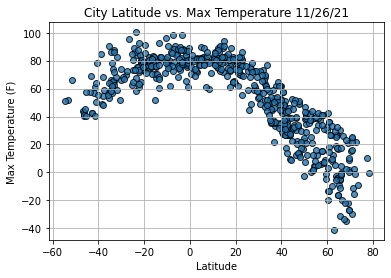

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

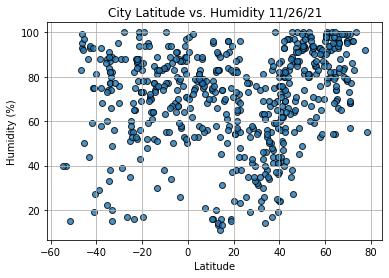

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

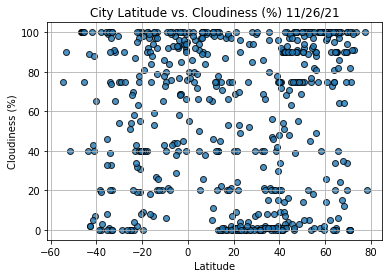

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

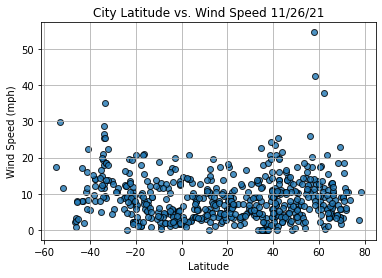

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nikolskoye,RU,2021-11-26 17:29:01,59.7035,30.7861,30.09,86,100,5.46
3,Fortuna,US,2021-11-26 17:29:02,40.5982,-124.1573,46.74,87,1,9.22
4,Georgetown,MY,2021-11-26 17:28:24,5.4112,100.3354,80.53,83,20,5.75
5,Norman Wells,CA,2021-11-26 17:29:02,65.2820,-126.8329,-9.36,70,90,12.66
6,Sangar,RU,2021-11-26 17:29:02,63.9242,127.4739,-2.76,82,95,15.50


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

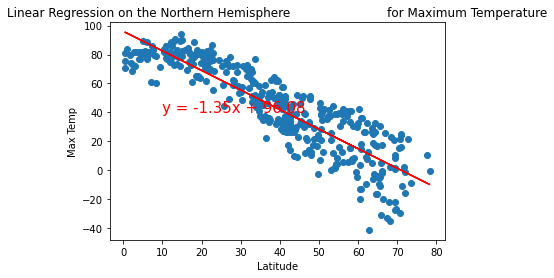

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

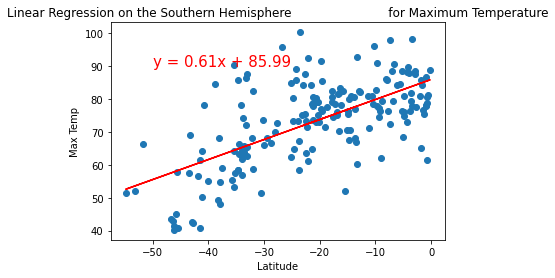

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

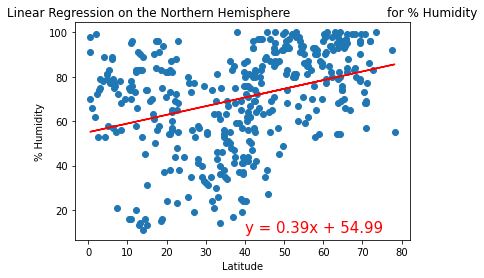

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

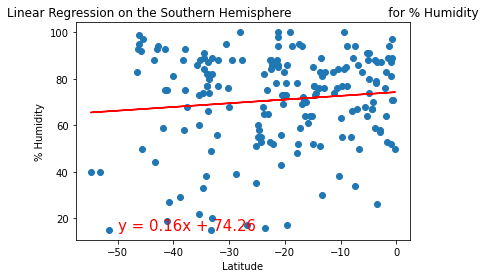

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

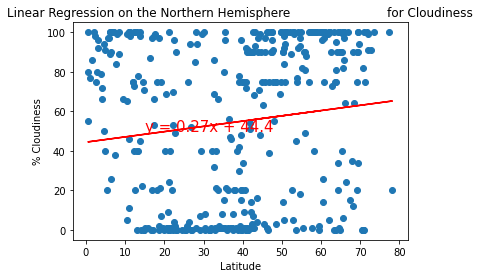

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(15,50))

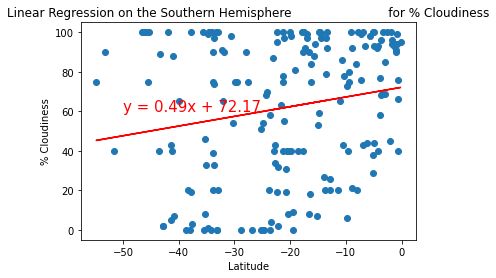

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

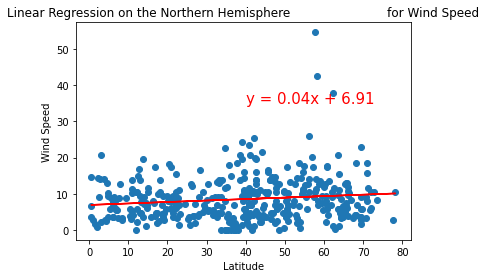

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

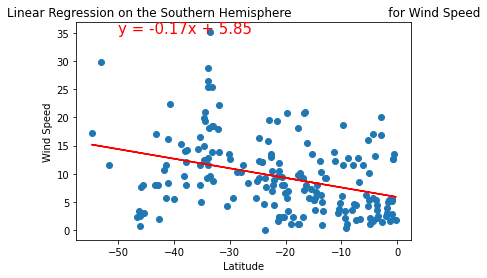

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))